In [ ]:
import numpy as np
import networkx as nx
import matplotlib.pyplot as plt
import time as time
import graphstate_opt as gso

As a simple example, we run our algorithms for a complete graph, which is known to be LC-equivalent to a start graph (obtained by applying local complementation to any vertex of the complete graph). We input the graph as an instance of a networkx complete graph. We input the values of maximum number of iterations of `SA` and the value of initial temperature to `SA+ILP`.   As expected, the output graphs from `SA`and `SA+ILP` are both star graphs.

SA_ILP runtime = 0.12997102737426758
ILP runtime = 0.0883171558380127


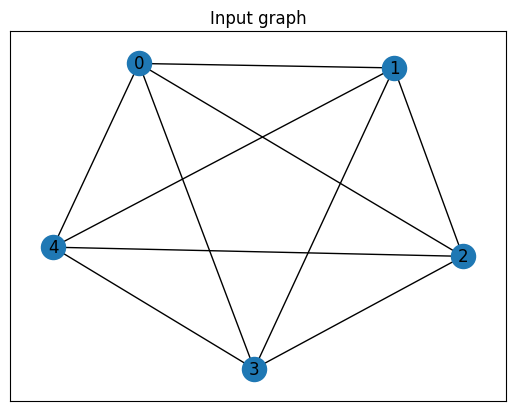

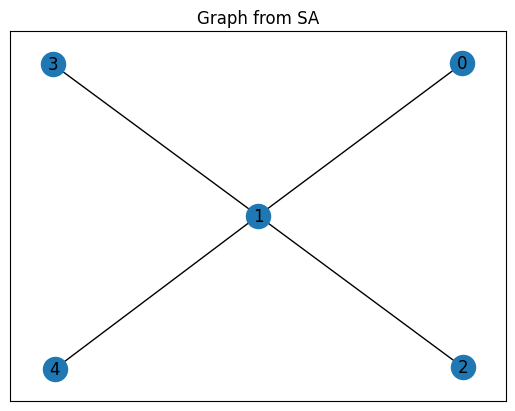

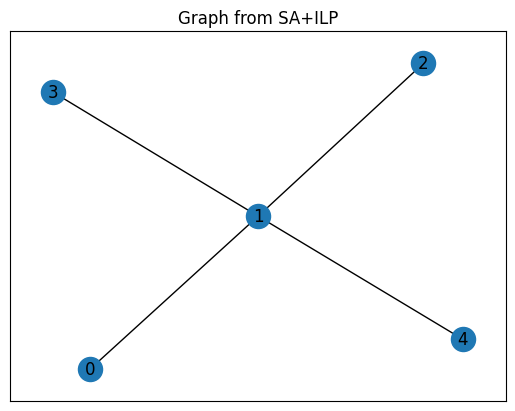

In [ ]:
#parameters maximum iterations and temperature for the SA algorithm
kmax = 100
temperature = 100

# defining the input graph as networkx complete graph
G = nx.complete_graph(5)

# calling and giving the graph G as the input to SA+ILP and ILP
# the function returns graphs obtained from SA and SA+ILP. 
# and the runtime of ILP and SA+ILP
output = gso.edm_sa_ilp(G, kmax, temperature)

#output graph from SA+ILP of the algorithm
gout_sailp = output[0]
# output graph from SA part
gout_sa = output[1]

#the runtimes for SA+ILP and ILP
sailp_runtime = output[4]
ilp_runtime = output[5]
print("SA_ILP runtime =", sailp_runtime)
print("ILP runtime =", ilp_runtime)

plt.figure()
plt.title("Input graph")
nx.draw_networkx(G)
plt.draw()
plt.show(block=False)

plt.figure()
plt.title("Graph from SA")
nx.draw_networkx(gout_sa)
plt.draw()
plt.show(block=False)


plt.figure()
plt.title("Graph from SA+ILP")
nx.draw_networkx(gout_sailp)
plt.draw()
plt.show(block=False)


Now we input arbitrary graph using the Erdos-Renyi graph model. 

Number of edges from SA = 7
Number of edges from SA+ILP = 7.0
SA_ILP runtime = 0.6431248188018799
ILP runtime = 0.6297121047973633


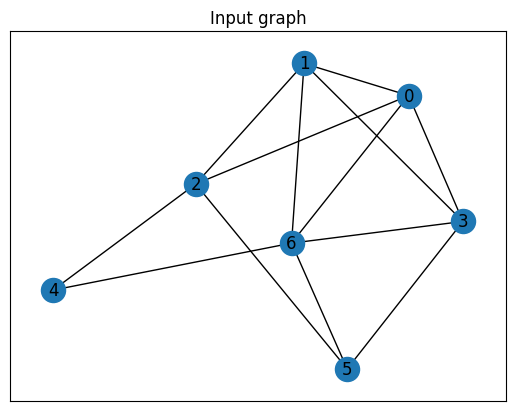

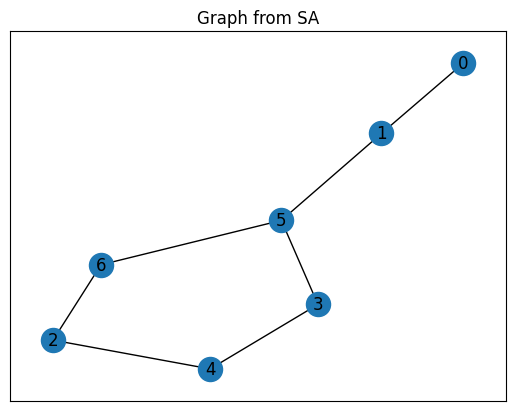

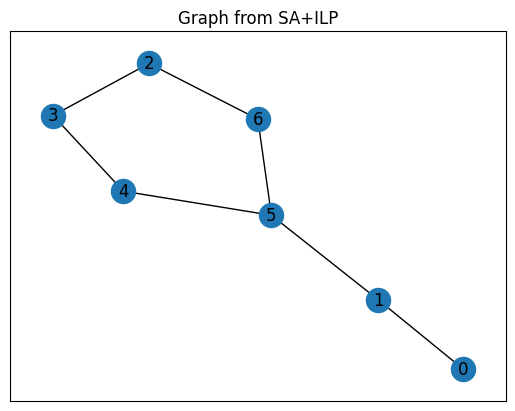

In [ ]:
#parameters maximum iterations and temperature for the SA algorithm
kmax = 100
temperature = 100

# defining the input graph as networkx complete graph
prob_of_edge_inclusion = 0.6
G = nx.erdos_renyi_graph(7, prob_of_edge_inclusion)

# calling and giving the graph G as the input to SA+ILP and ILP
# the function returns graphs obtained from SA and SA+ILP. 
# and the runtime of ILP and SA+ILP
output = gso.edm_sa_ilp(G, kmax, temperature)

#output graph from SA+ILP of the algorithm
gout_sailp = output[0]
# output graph from SA part
gout_sa = output[1]

#the number of output edges from SA and SA+ILP
sa_edges = output[2]
sailp_edges = output[3]
print("Number of edges from SA =", sa_edges)
print("Number of edges from SA+ILP =", sailp_edges)

#the runtimes for SA+ILP and ILP
sailp_runtime = output[4]
ilp_runtime = output[5]
print("SA_ILP runtime =", sailp_runtime)
print("ILP runtime =", ilp_runtime)

plt.figure()
plt.title("Input graph")
nx.draw_networkx(G)
plt.draw()
plt.show(block=False)

plt.figure()
plt.title("Graph from SA")
nx.draw_networkx(gout_sa)
plt.draw()
plt.show(block=False)


plt.figure()
plt.title("Graph from SA+ILP")
nx.draw_networkx(gout_sailp)
plt.draw()
plt.show(block=False)


As an example to show that `SA` can go up to graphs with 100 nodes, we run the following code. Here we have an Erdos-Renyi graph with 100 qubits and edge inclusion probability of 0.6. The maximum number of iterations is 1000 and the initial temperature is set to 100.

Runtime 18.445246934890747
Edges in original 2935
Edges obtianed from SA 2252


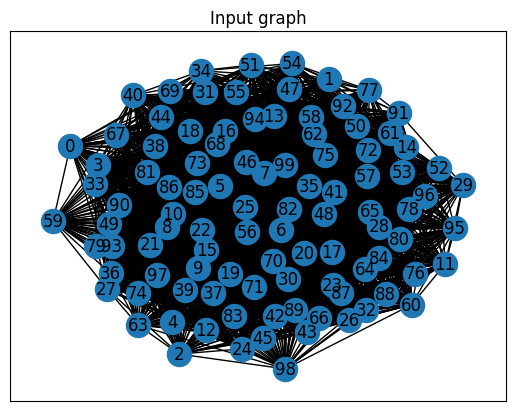

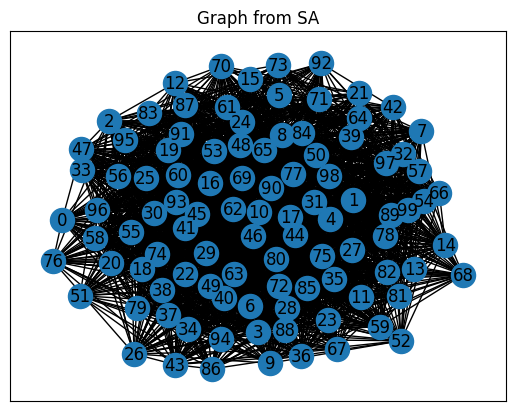

In [ ]:

# Erdos-Renyi graph as an input
G = nx.erdos_renyi_graph(100, 0.6)
kmax = 1000
temp = 100


t = time.time()
gout, _, _ = gso.edm_sa(G, kmax, temp)

print("Runtime", time.time()-t)
print("Edges in original", G.number_of_edges())
print("Edges obtianed from SA", gout.number_of_edges())#

#plotting the graph
plt.figure()
plt.title("Input graph")
nx.draw_networkx(G)
plt.draw()
plt.show(block=False)

plt.figure()
plt.title("Graph from SA")
nx.draw_networkx(gout)
plt.draw()
plt.show(block=False)